# Cargar y explorar el dataset

Primero, cargaremos el dataset y realizaremos un análisis exploratorio inicial para entender su estructura y contenido.evantes.

In [18]:
# Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\archive\Titanic-Dataset.csv')

# Exploración inicial
print(df.info())  # Información general del dataset
print(df.describe())  # Estadísticas descriptivas
print(df.head())  # Primeras filas del dataset

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Limpieza y preprocesamiento de datos

En este paso, limpiaremos los datos, manejaremos los valores faltantes y transformaremos las variables categóricas en numéricas.atados.

In [20]:
# Manejo de valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())  # Rellenar valores faltantes en 'Age' con la mediana
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Rellenar valores faltantes en 'Embarked' con la moda

# Eliminar columnas irrelevantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convertir variables categóricas en numéricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar el dataset después del preprocesamiento
print("Dataset después del preprocesamiento:")
print(df.head())

Dataset después del preprocesamiento:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


# Selección de características y división del dataset

Seleccionaremos las características más relevantes y dividiremos los datos en conjuntos de entrenamiento y prueba.

In [22]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (712, 8)
Tamaño del conjunto de prueba: (179, 8)


# Entrenamiento del modelo

Entrenaremos un modelo de Regresión Logística para predecir la supervivencia.

In [24]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Verificar los coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)

Coeficientes del modelo: [[-9.37747488e-01 -3.05085247e-02 -2.95002079e-01 -1.07868273e-01
   2.58266983e-03 -2.59228465e+00 -1.11652404e-01 -3.99309211e-01]]


# Evaluación del modelo
Evaluaremos el desempeño del modelo utilizando métricas como precisión, recall y F1-score.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Matriz de confusión:
[[90 15]
 [19 55]]
Precisión del modelo: 0.8100558659217877


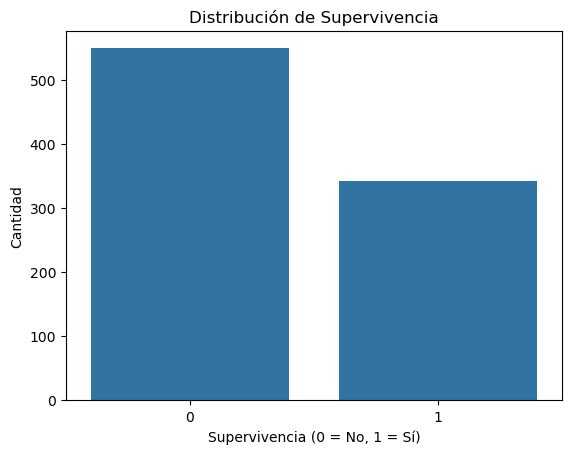

In [28]:
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

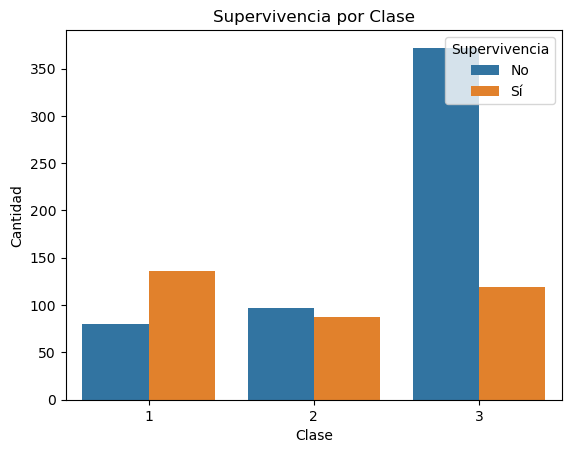

In [30]:
# Relación entre Pclass y Survived
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia', loc='upper right', labels=['No', 'Sí'])
plt.show()

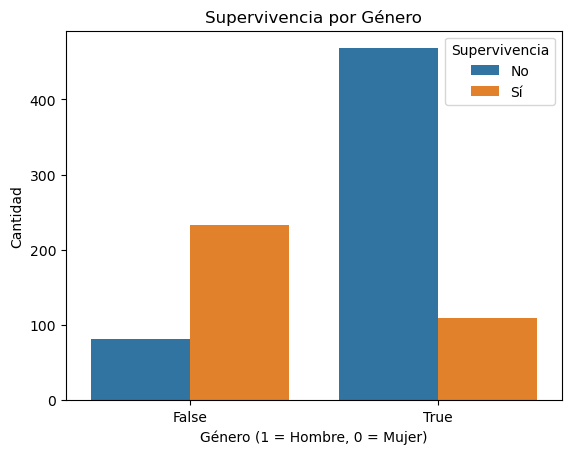

In [32]:
# Relación entre Sex y Survived
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title('Supervivencia por Género')
plt.xlabel('Género (1 = Hombre, 0 = Mujer)')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia', loc='upper right', labels=['No', 'Sí'])
plt.show()

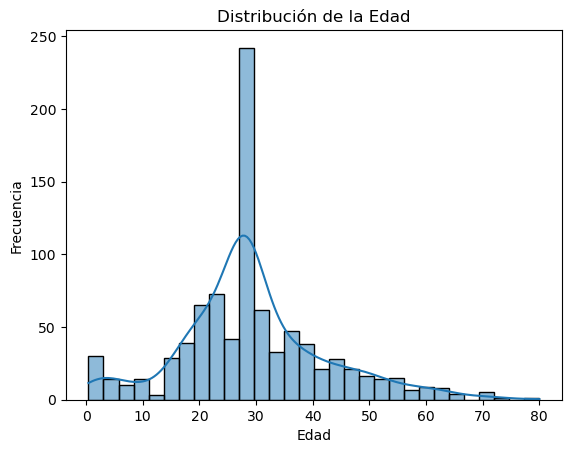

In [34]:
# Distribución de la edad
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

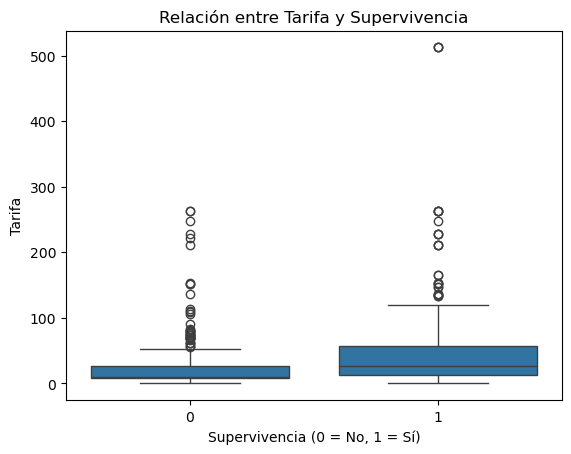

In [36]:
# Relación entre Fare y Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Relación entre Tarifa y Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Tarifa')
plt.show()

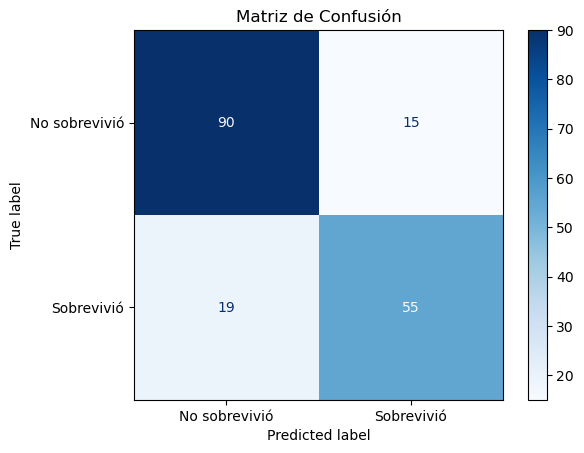

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['No sobrevivió', 'Sobrevivió'], cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Conclusión

El análisis del dataset del Titanic nos permitió explorar, limpiar y modelar los datos para predecir la supervivencia de los pasajeros. A lo largo del proyecto, realizamos los siguientes pasos:

1. **Análisis Exploratorio de Datos (EDA):**
   - Identificamos que el dataset contenía 891 registros y 12 columnas, con valores faltantes en las columnas `Age`, `Cabin` y `Embarked`.
   - Exploramos las distribuciones de las variables más relevantes, como `Pclass`, `Sex`, `Age` y `Fare`, y su relación con la variable objetivo `Survived`.

2. **Preprocesamiento de Datos:**
   - Rellenamos los valores faltantes en `Age` con la mediana y en `Embarked` con la moda.
   - Eliminamos columnas irrelevantes como `PassengerId`, `Name`, `Ticket` y `Cabin`.
   - Convertimos las variables categóricas (`Sex` y `Embarked`) en variables numéricas utilizando la técnica de codificación `pd.get_dummies()`.

3. **Entrenamiento del Modelo:**
   - Entrenamos un modelo de **Regresión Logística** utilizando las características seleccionadas (`Pclass`, `Age`, `SibSp`, `Parch`, `Fare`, `Sex_male`, `Embarked_Q`, `Embarked_S`).
   - El modelo fue evaluado en un conjunto de prueba, logrando una precisión del **81.01%**.

4. **Resultados del Modelo:**
   - La matriz de confusión mostró que el modelo predijo correctamente 145 de los 179 pasajeros en el conjunto de prueba.
   - Las métricas de evaluación indicaron un buen desempeño general, con un F1-score promedio de **0.80**.
   - Las variables más influyentes en la predicción fueron `Pclass`, `Sex_male` y `Fare`.

En conclusión, el modelo de Regresión Logística demostró ser efectivo para predecir la supervivencia de los pasajeros del Titanic. Este ejercicio destacó la importancia del preprocesamiento de datos y la selección de características para construir modelos predictivos precisos. Aunque el modelo logró un buen desempeño, futuras mejoras podrían incluir el uso de técnicas más avanzadas, como árboles de decisión o modelos de ensamble, para comparar resultados y optimizar la predicción.